In [1]:
from mlxtend.data import loadlocal_mnist

from imageio import imread

import visvis as vv

import numpy as np

from PIL import Image

import copy

import matplotlib.pyplot as plt

# OpenCV (CV stands for Computer Vision) is a famous python library for Image Analysis 
import cv2

import statistics 

There's no training needed, so we only use the test dataset

In [2]:
directory = '/home/erik/Documents/Image-Analysis/'

X, y = loadlocal_mnist(
        images_path= directory + 't10k-images.idx3-ubyte', 
        labels_path= directory + 't10k-labels.idx1-ubyte')

In [3]:
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])
print('Dimensions of first image: %s' % (X[0].shape[0]))

print('This means that the images are 28 x 28 cells')

Dimensions: 10000 x 784
Dimensions of first image: 784
This means that the images are 28 x 28 cells


In [4]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


# Let's have a look at the first two images in the dataset:

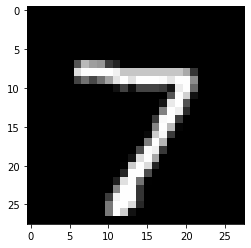

Index of image: 0, Label of image: 7


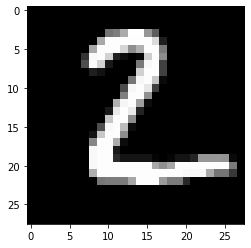

Index of image: 1, Label of image: 2


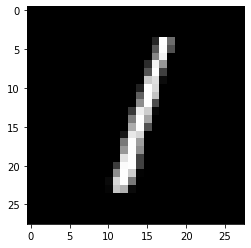

Index of image: 2, Label of image: 1


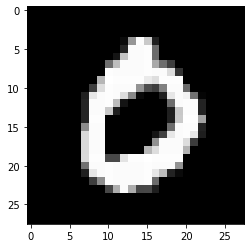

Index of image: 3, Label of image: 0


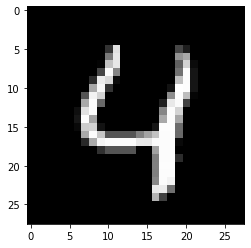

Index of image: 4, Label of image: 4


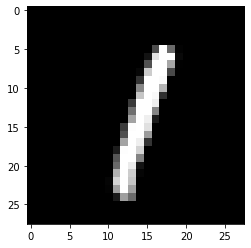

Index of image: 5, Label of image: 1


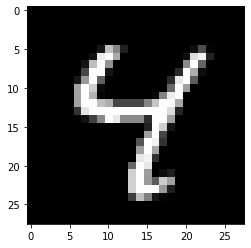

Index of image: 6, Label of image: 4


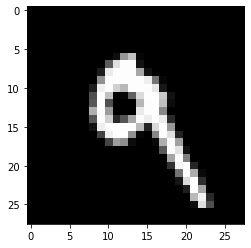

Index of image: 7, Label of image: 9


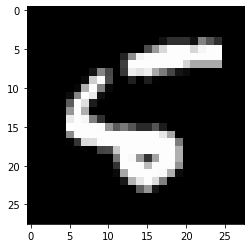

Index of image: 8, Label of image: 5


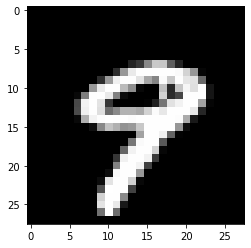

Index of image: 9, Label of image: 9


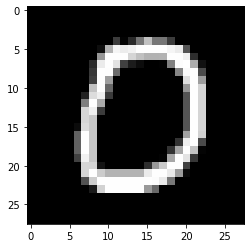

Index of image: 10, Label of image: 0


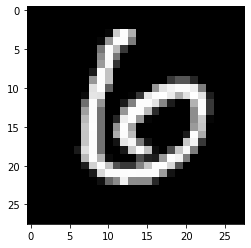

Index of image: 11, Label of image: 6


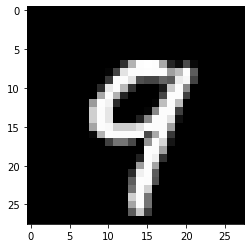

Index of image: 12, Label of image: 9


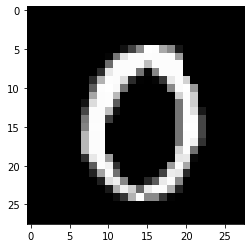

Index of image: 13, Label of image: 0


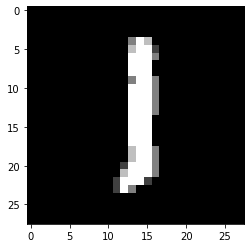

Index of image: 14, Label of image: 1


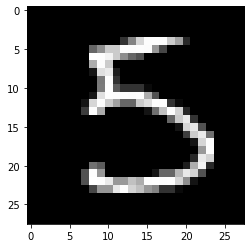

Index of image: 15, Label of image: 5


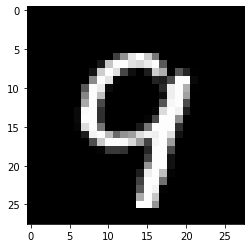

Index of image: 16, Label of image: 9


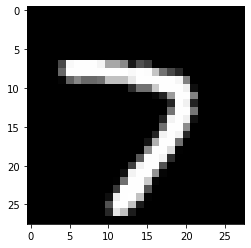

Index of image: 17, Label of image: 7


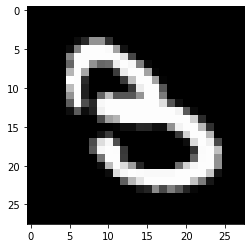

Index of image: 18, Label of image: 3


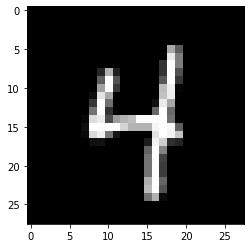

Index of image: 19, Label of image: 4


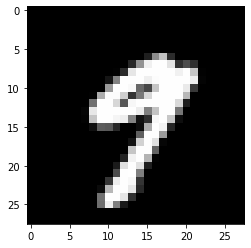

Index of image: 20, Label of image: 9


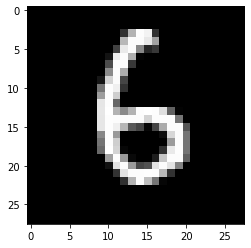

Index of image: 21, Label of image: 6


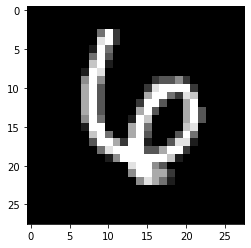

Index of image: 22, Label of image: 6


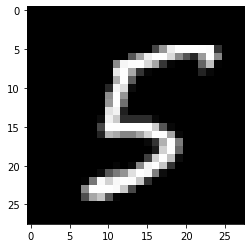

Index of image: 23, Label of image: 5


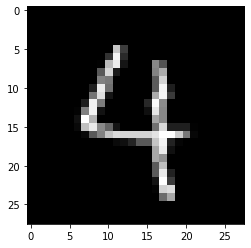

Index of image: 24, Label of image: 4


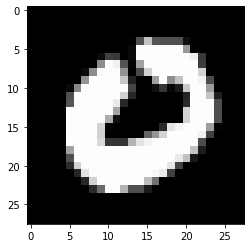

Index of image: 25, Label of image: 0


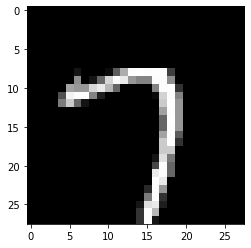

Index of image: 26, Label of image: 7


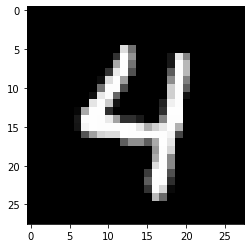

Index of image: 27, Label of image: 4


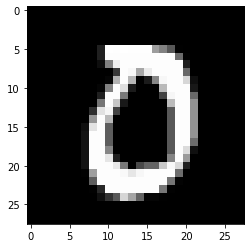

Index of image: 28, Label of image: 0


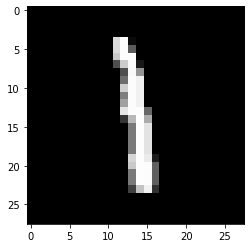

Index of image: 29, Label of image: 1


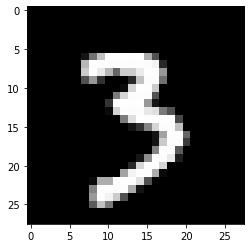

Index of image: 30, Label of image: 3


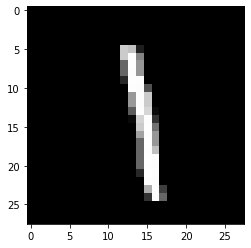

Index of image: 31, Label of image: 1


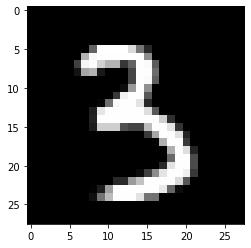

Index of image: 32, Label of image: 3


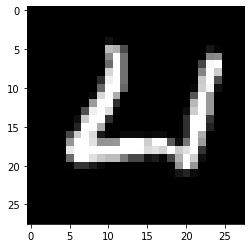

Index of image: 33, Label of image: 4


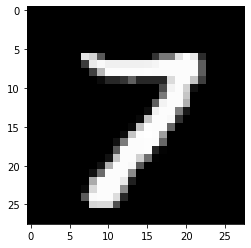

Index of image: 34, Label of image: 7


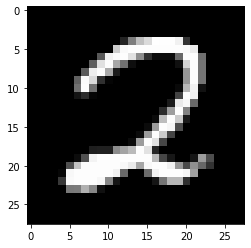

Index of image: 35, Label of image: 2


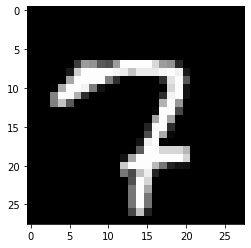

Index of image: 36, Label of image: 7


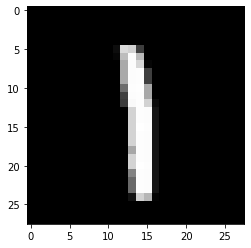

Index of image: 37, Label of image: 1


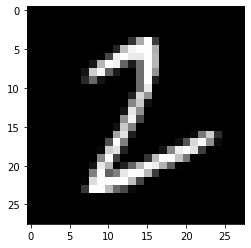

Index of image: 38, Label of image: 2


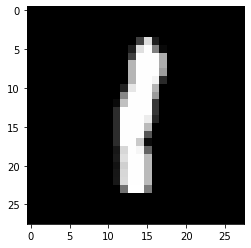

Index of image: 39, Label of image: 1


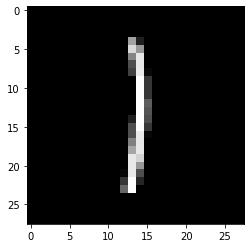

Index of image: 40, Label of image: 1


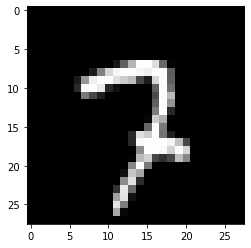

Index of image: 41, Label of image: 7


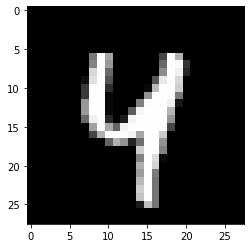

Index of image: 42, Label of image: 4


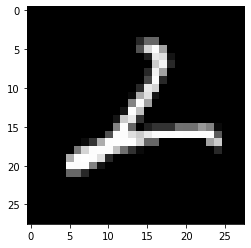

Index of image: 43, Label of image: 2


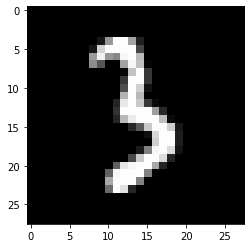

Index of image: 44, Label of image: 3


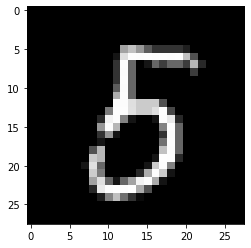

Index of image: 45, Label of image: 5


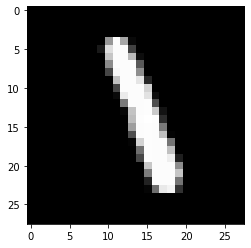

Index of image: 46, Label of image: 1


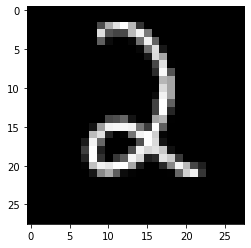

Index of image: 47, Label of image: 2


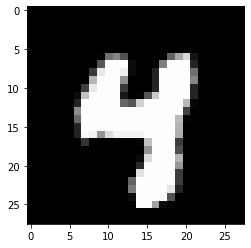

Index of image: 48, Label of image: 4


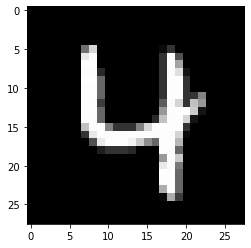

Index of image: 49, Label of image: 4


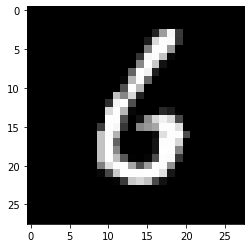

Index of image: 50, Label of image: 6


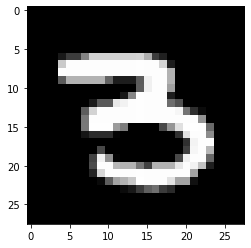

Index of image: 51, Label of image: 3


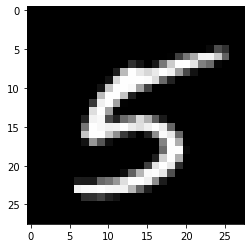

Index of image: 52, Label of image: 5


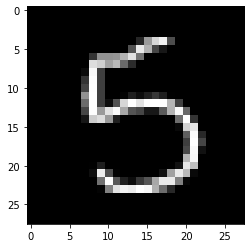

Index of image: 53, Label of image: 5


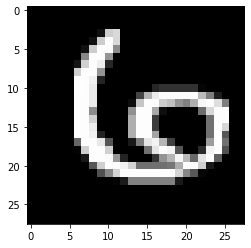

Index of image: 54, Label of image: 6


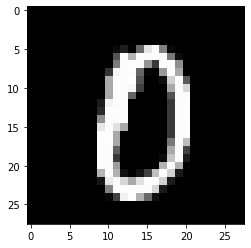

Index of image: 55, Label of image: 0


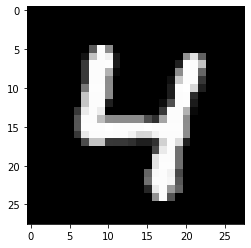

Index of image: 56, Label of image: 4


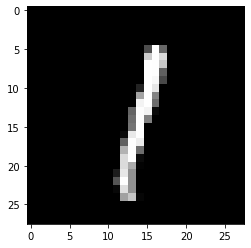

Index of image: 57, Label of image: 1


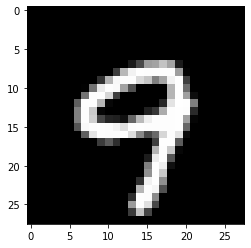

Index of image: 58, Label of image: 9


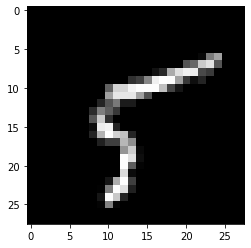

Index of image: 59, Label of image: 5


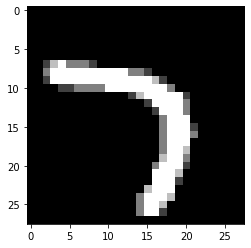

Index of image: 60, Label of image: 7


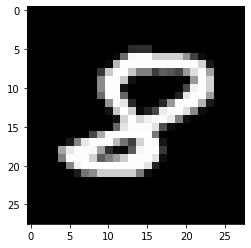

Index of image: 61, Label of image: 8


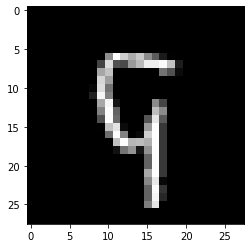

Index of image: 62, Label of image: 9


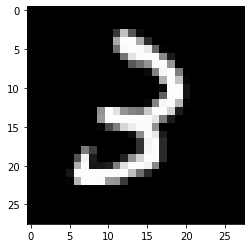

Index of image: 63, Label of image: 3


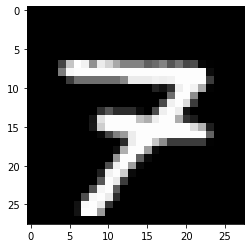

Index of image: 64, Label of image: 7


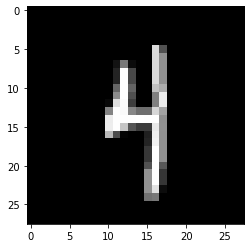

Index of image: 65, Label of image: 4


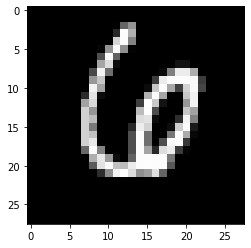

Index of image: 66, Label of image: 6


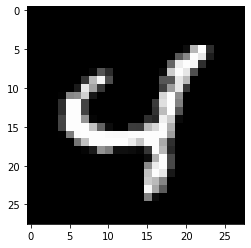

Index of image: 67, Label of image: 4


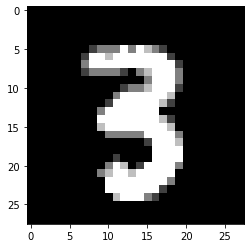

Index of image: 68, Label of image: 3


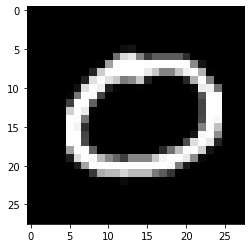

Index of image: 69, Label of image: 0


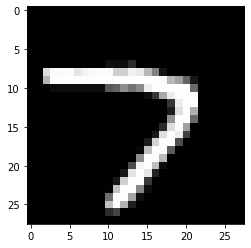

Index of image: 70, Label of image: 7


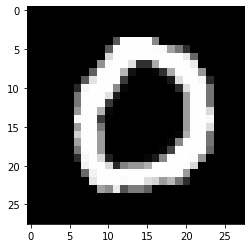

Index of image: 71, Label of image: 0


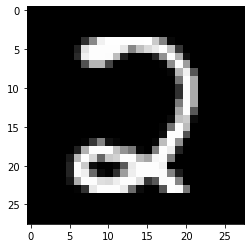

Index of image: 72, Label of image: 2


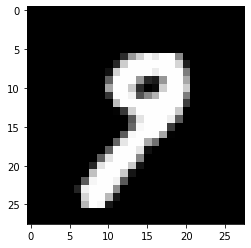

Index of image: 73, Label of image: 9


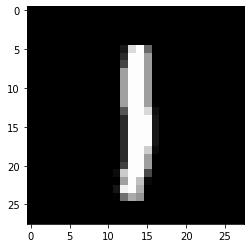

Index of image: 74, Label of image: 1


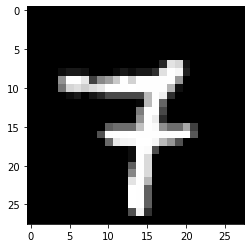

Index of image: 75, Label of image: 7


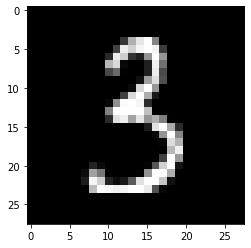

Index of image: 76, Label of image: 3


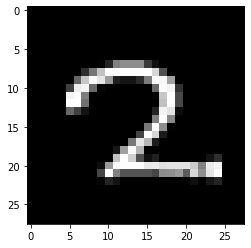

Index of image: 77, Label of image: 2


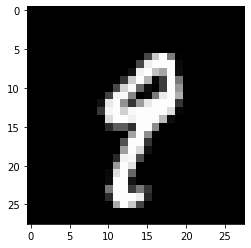

Index of image: 78, Label of image: 9


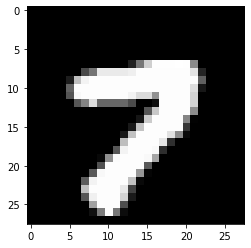

Index of image: 79, Label of image: 7


In [18]:
NrOfImagesToShow = 80

for i in range(0,NrOfImagesToShow):
    myimage = X[i].reshape((28,28))
    plt.imshow(myimage,'gray')
    plt.show() 
    print('Index of image: %s, Label of image: %s' %(i, y[i]))

# Resize and interpolation

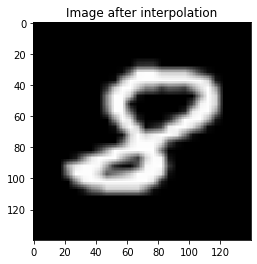

In [64]:
ImageLabel = 61  # Here you can choose which image you want to select

Image0 = X[ImageLabel]

# Make the image three times as big and use Bilinear Interpolation method
resizing = 5
Image = cv2.resize(Image0.reshape((28,28)),None, fx = resizing, fy = resizing, interpolation = cv2.INTER_LINEAR)
    
plt.imshow(Image,'gray')
plt.title('Image after interpolation')
plt.show() 

# Thresholding to creating a binary image:

Threshold value: 40


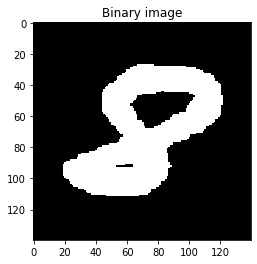

In [65]:
tvalue = statistics.mean(Image0)  # For the threshold value I'm using the mean of the pixel values
maxvalue = max(Image0)            # The maximum value present in the image

print('Threshold value: %s' %(tvalue))

ret,BinIm = cv2.threshold(Image,tvalue,maxvalue,cv2.THRESH_BINARY)

plt.imshow(BinIm,'gray')
plt.title('Binary image')
plt.show()

Create a edge and then a contour around the object

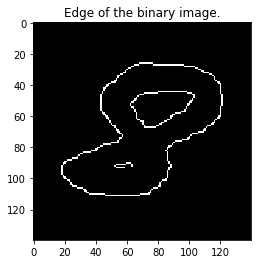

Numbers of contours found= 3


In [66]:
edged=cv2.Canny(BinIm, 10, 200)

plt.imshow(edged, 'gray')
plt.title('Edge of the binary image.')
plt.show()

(contours, _)=cv2.findContours(BinIm,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

print('Numbers of contours found= ' + str(len(contours)))

Descriptors of the object

In [69]:
if len(contours) > 2:
    # Only for digit 8
    innerArea1 = cv2.contourArea(contours[0])
    innerArea2 = cv2.contourArea(contours[1])
    totalArea = cv2.contourArea(contours[2])
    realArea = totalArea - innerArea
    print('First inner area: %s, Second inner area: %s, Total area: %s, Actual area: %s' %(innerArea1, innerArea2, 
                                                                                           totalArea, realArea))
    
    contour = contours[2]

elif len(contours) == 2:
    # For digits 0, 6 and 9
    innerArea = cv2.contourArea(contours[0])
    totalArea = cv2.contourArea(contours[1])
    realArea = totalArea - innerArea
    print('Inner area: %s, Total area: %s, Actual area: %s' %(innerArea, totalArea, realArea))
    
    moments = cv2.moments(contours[0])
    print(moments)
    xcentroid = moments['m10']/moments['m00']
    ycentroid = moments['m01']/moments['m00']
    print('x: %s, y: %s' %(xcentroid, ycentroid))
    
    contour = contours[1]
    
else:
    # For digits 1, 2, 3, 4, 5, 7
    realArea = cv2.contourArea(contours[0])
    print('Area: %s' %(realArea))
    
    contour = contours[0]
    
    
#Calculates a contour perimeter or a curve length.
perimeter = cv2.arcLength(contour, True)
print('Perimeter: %s' %(perimeter))
              
#Calculate the width, height and asepct ratio
rect = cv2.boundingRect(contour)
(startingx, startingy, width, height) = rect
aspect_ratio = height / width
print('Width: %s, Height: %s, Aspect ratio: %s' %(width, height, aspect_ratio))    

First inner area: 27.5, Second inner area: 665.0, Total area: 4956.0, Actual area: 4928.5
Perimeter: 347.4213538169861
Width: 103, Height: 85, Aspect ratio: 0.8252427184466019


Using erosion and dilation to get a fatter binary image

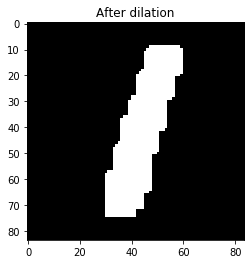

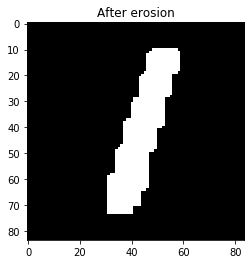

In [12]:
kernel = np.ones((5,5), np.uint8) 
img_dilation = cv2.dilate(BinIm, kernel, iterations=1) 
kernel = np.ones((3,3), np.uint8) 
img_erosion = cv2.erode(img_dilation, kernel, iterations=1) 

plt.imshow(img_dilation, 'gray')
plt.title('After dilation')
plt.show()

plt.imshow(img_erosion, 'gray')
plt.title('After erosion')
plt.show()

#BinIm = img_erosion

How to convert the NumPy array into an image type

In [13]:
# Saving the image as a png
# myimage = Image.fromarray(myimage, 'L')
#myimage.save('my.png')
#myimage.show()

# Segmentation

In [14]:

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(BinIm)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

NameError: name 'ndimage' is not defined

In [ ]:
from skimage.feature import peak_local_max

distTrans = cv2.distanceTransform(BinIm, cv2.DIST_L1, 3)

plt.imshow(distTrans,'gray')
plt.title('Distance Transform')
plt.show()

localMax = peak_local_max(distTrans, indices=False, min_distance=0, labels=BinIm)

plt.imshow(localMax,'gray')
plt.title('Local max')
plt.show()


In [ ]:
from scipy import ndimage

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
print(distTrans)
print(markers)
distTrans = distTrans.astype(np.uint8)
markers = markers.astype(np.uint8)
labels = cv2.watershed(-distTrans, markers)
#print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

In [ ]:
fg = cv2.erode(BinIm,None,iterations = 1)

fg = BinIm

plt.imshow(fg,'gray')
plt.show()

bgt = cv2.dilate(BinIm,None,iterations = 2)
ret,bg = cv2.threshold(bgt,1,128,1)

plt.imshow(bg,'gray')
plt.show()

marker = cv2.add(fg,bg)

plt.imshow(marker,'gray')
plt.show()

marker32 = np.int32(marker)

In [ ]:
clrimage = cv2.cvtColor(myimage, cv2.COLOR_GRAY2BGR)

Watershed = cv2.watershed(clrimage,marker32)

plt.imshow(Watershed)
plt.show()

m = cv2.convertScaleAbs(marker32)

In [ ]:
ret,thresh = cv2.threshold(m,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(clrimage,clrimage,mask = thresh)

In [ ]:
plt.imshow(Watershed)
plt.show()